In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
path = r'All_sky_camera_Astropark_Chaingmai\2024-06-03'

images_read = []

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path,filename))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if img is not None:
        images_read.append(img)

In [2]:
mask = cv2.imread('mask_delete_5.png',cv2.IMREAD_GRAYSCALE)

images_mask = []

for i in images_read:
    clear_bg = cv2.bitwise_and(i,i,mask=mask)
    clear_r,_,_ = cv2.split(clear_bg)
    images_mask.append(clear_bg)

In [3]:
images_sun = []
images_complete = []
ranges = []

for i in images_mask:
    r,g,b = cv2.split(i)
    bias_r = int(np.round(np.mean(r)))
    bias_g = int(np.round(np.mean(g)))
    bias_b = int(np.round(np.mean(b)))
    low = np.array([255-bias_r,255-bias_g,255-bias_b])
    high = np.array([255,255,255])

    range_i = cv2.inRange(i,low,high)
    sun = cv2.bitwise_and(i,i,mask=range_i)
    ranges.append(range_i)

    images_sun.append(cv2.threshold(cv2.cvtColor(sun,cv2.COLOR_RGB2GRAY),127,255,cv2.THRESH_BINARY)[1])

    M = cv2.moments(cv2.threshold(cv2.cvtColor(sun,cv2.COLOR_RGB2GRAY),127,255,cv2.THRESH_BINARY)[1])

    try:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        size = int(np.sqrt(cv2.countNonZero(range_i)/np.pi)*0.68)
        cv2.circle(i, (cX, cY), size, (0, 0, 0), -1)

        images_complete.append(i)
    except:
        images_complete.append(i)

ValueError: invalid literal for int() with base 10: ''

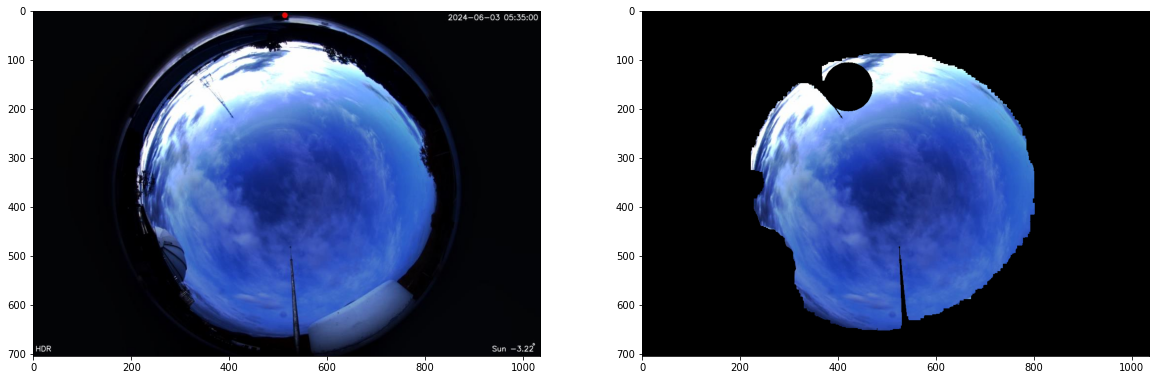

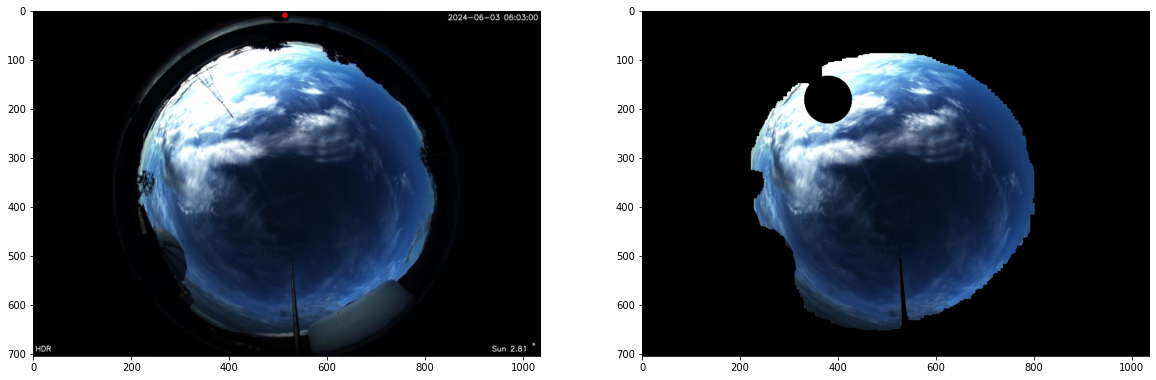

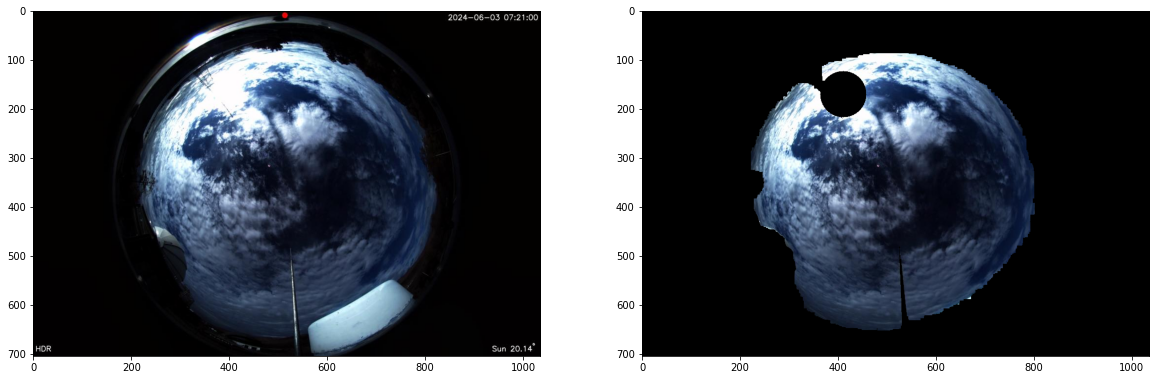

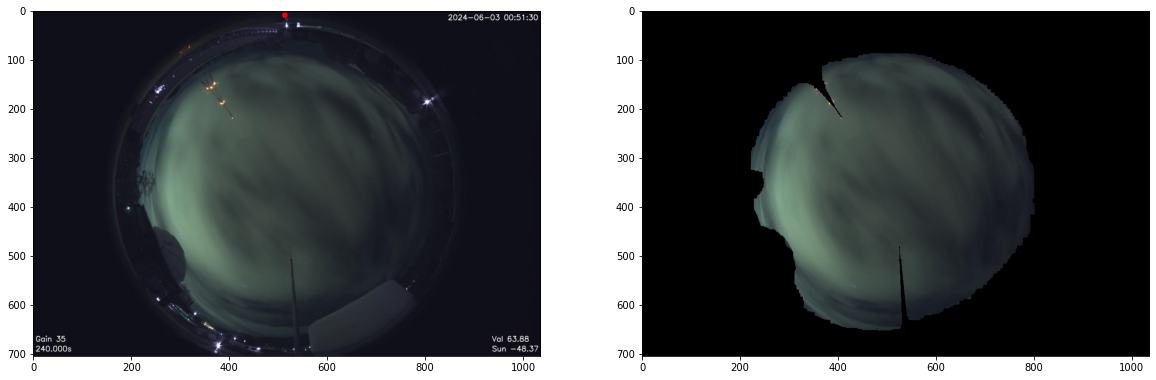

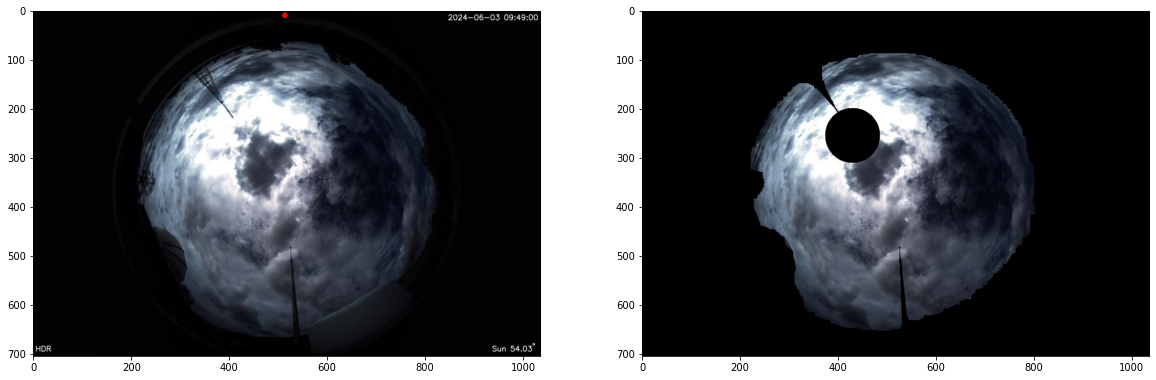

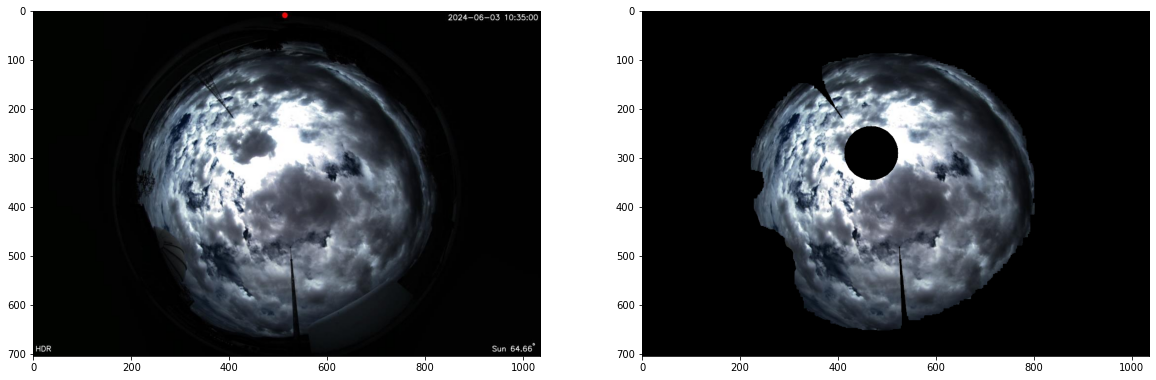

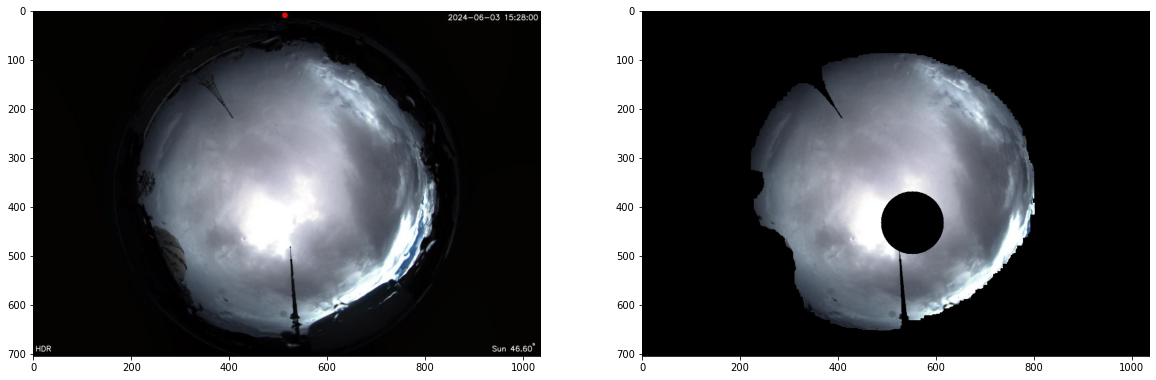

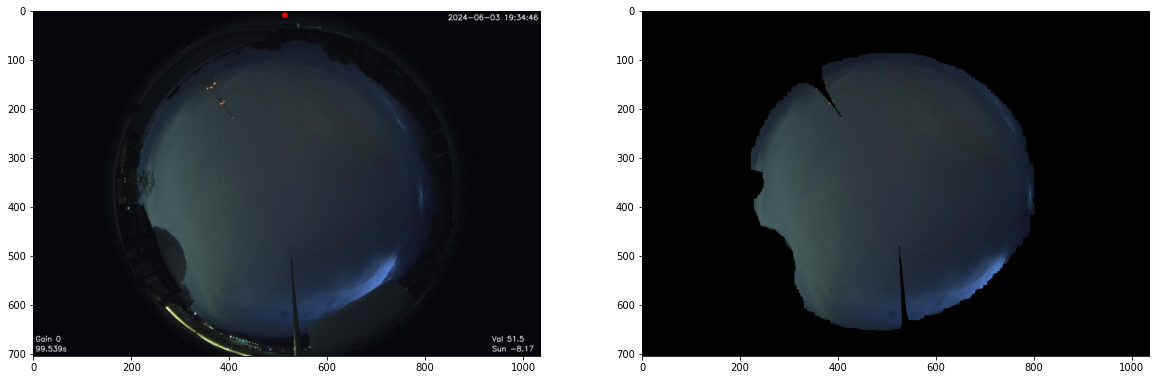

In [4]:
while True:

    i = int(input("Select image"))

    if type(i) is int:
        plt.figure(figsize=(20,20))
        plt.subplot(1,2,1)
        plt.imshow(images_read[i])
        plt.subplot(1,2,2)
        plt.imshow(images_complete[i])
    else:
        break

In [ ]:
edging = cv2.Canny(images_complete[250],50,255)

plt.figure(figsize=(20,20))
plt.imshow(edging)